In [380]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak")
df=pd.read_csv('Life-Expectancy-Data-Averaged.csv')
df.head(10)

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status,Life_expectancy
0,Afghanistan,Asia,2007.5,71.08125,98.61250,265.804969,0.016125,64.5625,24.3750,22.46250,55.3750,55.1250,0.022500,408.5625,27.450625,16.58125,15.58125,2.90000,1.0,59.65625
1,Albania,Rest of Europe,2007.5,15.25625,17.14375,83.132969,4.696875,98.0000,95.9375,25.85625,98.1250,98.0625,0.025625,3071.1250,2.969375,1.61875,1.70000,9.24375,1.0,75.95000
2,Algeria,Africa,2007.5,26.75625,31.19375,113.439281,0.400625,88.3125,93.2500,24.86875,91.7500,91.8750,0.021875,3745.1250,34.820625,6.09375,5.97500,6.99375,1.0,73.78750
3,Angola,Africa,2007.5,88.76875,144.16250,297.844063,4.935625,68.8125,64.0000,22.51875,35.7500,55.5625,1.303750,2647.8125,21.623750,6.19375,6.66875,4.60625,1.0,52.82500
4,Antigua and Barbuda,Central America and Caribbean,2007.5,9.47500,11.51875,142.478813,7.755000,98.2500,75.4375,25.85000,96.9375,98.3125,0.125000,14678.7500,0.085000,3.42500,3.37500,9.01875,1.0,75.35000
5,Argentina,South America,2007.5,13.85000,15.50625,127.912656,7.959375,85.3125,84.6875,26.85000,92.2500,92.3750,0.145625,12169.1250,39.913125,1.07500,0.95000,9.36875,1.0,74.86250
6,Armenia,Rest of Europe,2007.5,19.03125,21.39375,137.939937,3.734375,87.5625,94.6875,25.94375,94.1875,92.4375,0.080625,2657.3750,2.951250,2.03750,2.11250,11.05625,1.0,72.98750
7,Australia,Oceania,2007.5,4.31250,5.15625,65.958594,10.145625,93.5000,87.2500,26.75000,91.8125,91.9375,0.046875,51750.9375,21.289375,0.66875,0.62500,12.18750,0.0,81.11250
8,Austria,European Union,2007.5,3.81250,4.60000,78.310500,12.226875,81.0625,60.9375,25.29375,86.0000,86.7500,0.080000,42376.0000,8.295625,1.73125,1.93750,10.83125,0.0,79.97500
9,Azerbaijan,Asia,2007.5,39.45625,46.33750,144.664344,0.747500,68.1875,79.5625,26.19375,84.8125,82.3125,0.124375,3813.6875,8.760000,2.90000,2.94375,10.61250,1.0,69.72500


In [284]:
df.shape

(179, 20)

In [286]:
df.columns

Index(['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status',
       'Life_expectancy'],
      dtype='object')

In [288]:
df.isna().sum()

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status                 0
Life_expectancy                0
dtype: int64

In [340]:
def statistical_analysis(df):
    """
    Function to perform statistical analysis and explain the findings.
    Arguments:
        df (DataFrame): The data to be analyzed.
    """
    
    data = df.select_dtypes(include=['number'])
    
    # Perform analysis on numeric columns only
    if data.empty:
        print("No numeric data available for analysis.")
        return
    
    
    # Statistical Summary (mean, median, standard deviation)
    findings = data.describe().T  # Transpose to better view the summary
    findings['skewness'] = data.skew()  # Skewness
    findings['kurtosis'] = data.kurtosis()  # Kurtosis

    # Display statistical analysis
    print("Statistical analysis:\n", findings)

    # Provide detailed explanation
    print("\nResult:")
    for column in data.columns:
        mean = data[column].mean()
        median = data[column].median()
        std_dev = data[column].std()
        skew = data[column].skew()
        kurt = data[column].kurtosis()

        print(f"\n{column} Statistics:")
        print(f" Mean: {mean}")
        print(f" Median: {median}")
        print(f" Standard Deviation: {std_dev}")
        print(f" Skewness: {skew}")
        print(f" Kurtosis: {kurt}")
statistical_analysis(df)


Statistical analysis:
                              count          mean           std          min  \
Year                         179.0   2007.500000      0.000000  2007.500000   
Infant_deaths                179.0     30.363792     26.725485     2.381250   
Under_five_deaths            179.0     42.938268     42.916952     3.000000   
Adult_mortality              179.0    192.251775    111.659044    57.710313   
Alcohol_consumption          179.0      4.820882      3.914554     0.000025   
Hepatitis_B                  179.0     84.292598     13.820223    30.687500   
Measles                      179.0     77.344972     17.315208    16.250000   
BMI                          179.0     25.032926      2.165490    20.212500   
Polio                        179.0     86.499651     13.581153    35.750000   
Diphtheria                   179.0     86.271648     13.931532    31.312500   
Incidents_HIV                179.0      0.894288      2.311895     0.010000   
GDP_per_capita               

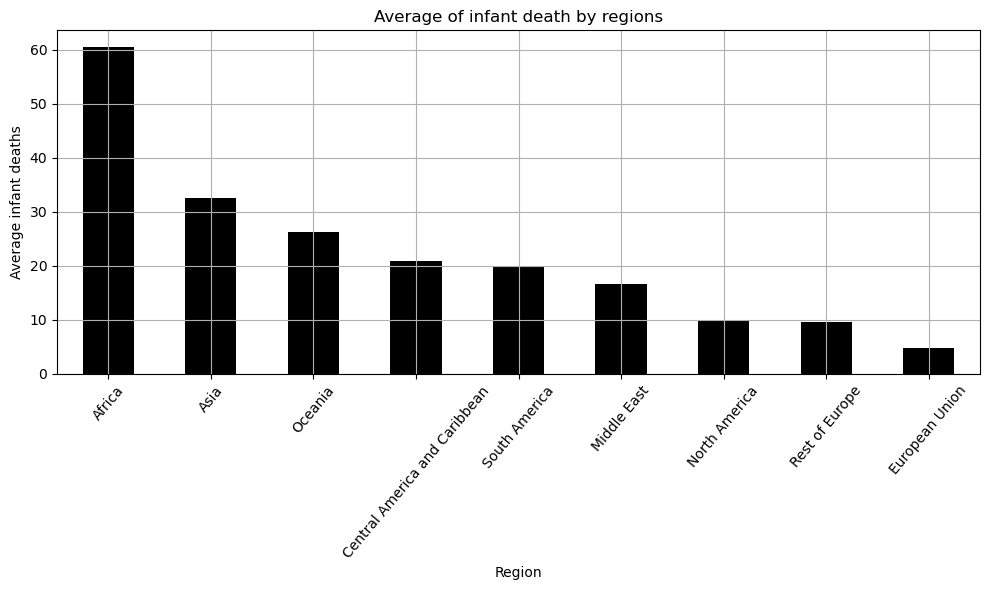

In [392]:
def first_barchart():
    '''
    This is teh bar chart of region vs average infant deaths
    '''
    #Doing the groupby to find the average infant death by region.
    average_infant_death = df.groupby('Region')['Infant_deaths'].mean().sort_values(ascending=False)
    #plotting the figure
    plt.figure(figsize=(10, 6))
    average_infant_death.plot(kind='bar', color='black')
    #giving the title ,labels
    plt.title('Average of infant death by regions')
    plt.xlabel('Region')
    plt.ylabel('Average infant deaths')
    plt.xticks(rotation=50)
    plt.tight_layout()
    plt.grid()
    #showing the plot
    plt.show()
first_barchart()

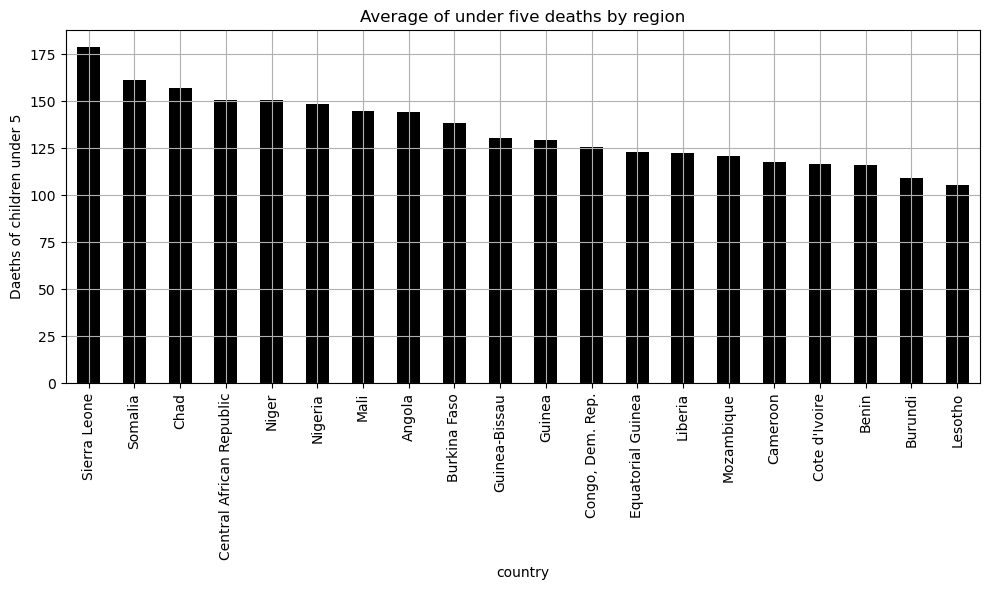

In [396]:
def second_barchart():
    '''
    This is the bar chart of region vs average under 5 deaths
    '''
    #Doing the groupby to find the average under five death by region.
    under_five_deaths = df.groupby('Country')['Under_five_deaths'].mean().sort_values(ascending=False)
    #for proper visualization we only take the first 20 datas
    under_five_deaths_top10=under_five_deaths[:20]
    #ploting the figure
    plt.figure(figsize=(10, 6))
    under_five_deaths_top10.plot(kind='bar', color='black')
    #setting the title,label
    plt.title('Average of under five deaths by region')
    plt.xlabel('country')
    plt.ylabel('Daeths of children under 5')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.grid()
    plt.show()
second_barchart()

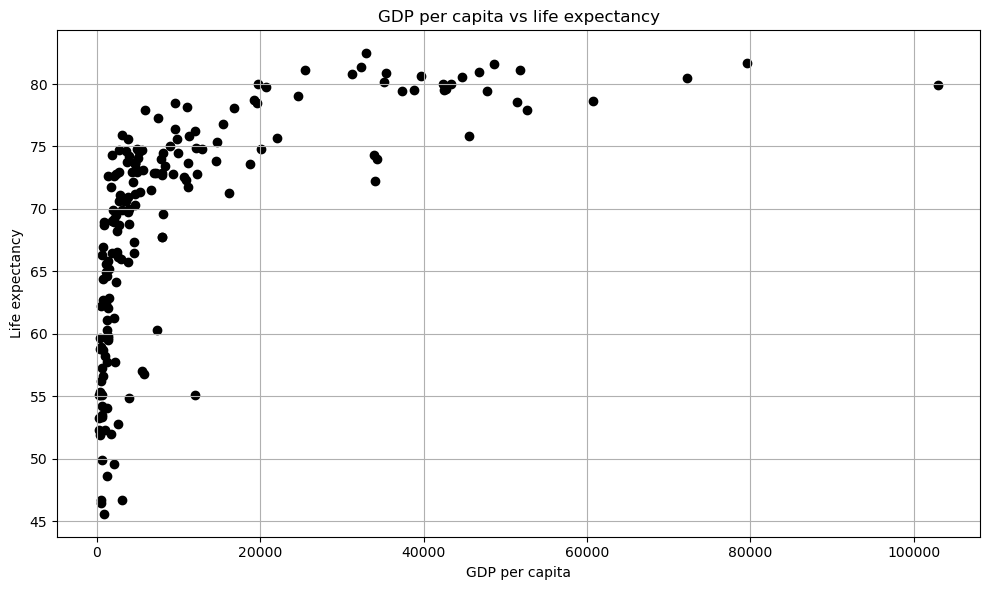

In [398]:
def scatter_polt():
    '''
    This is the scatter plot of life expectancy vs GDP percapital
    '''
    #ploting the plot
    plt.figure(figsize=(10, 6))
    plt.scatter(df['GDP_per_capita'],df['Life_expectancy'], color='black')
    #setting up the title xlabel,ylabel.
    plt.title('GDP per capita vs life expectancy')
    plt.xlabel('GDP per capita')
    plt.ylabel('Life expectancy')
    plt.grid()
    plt.tight_layout()
    #shhowing the plot
    plt.show()
scatter_polt()

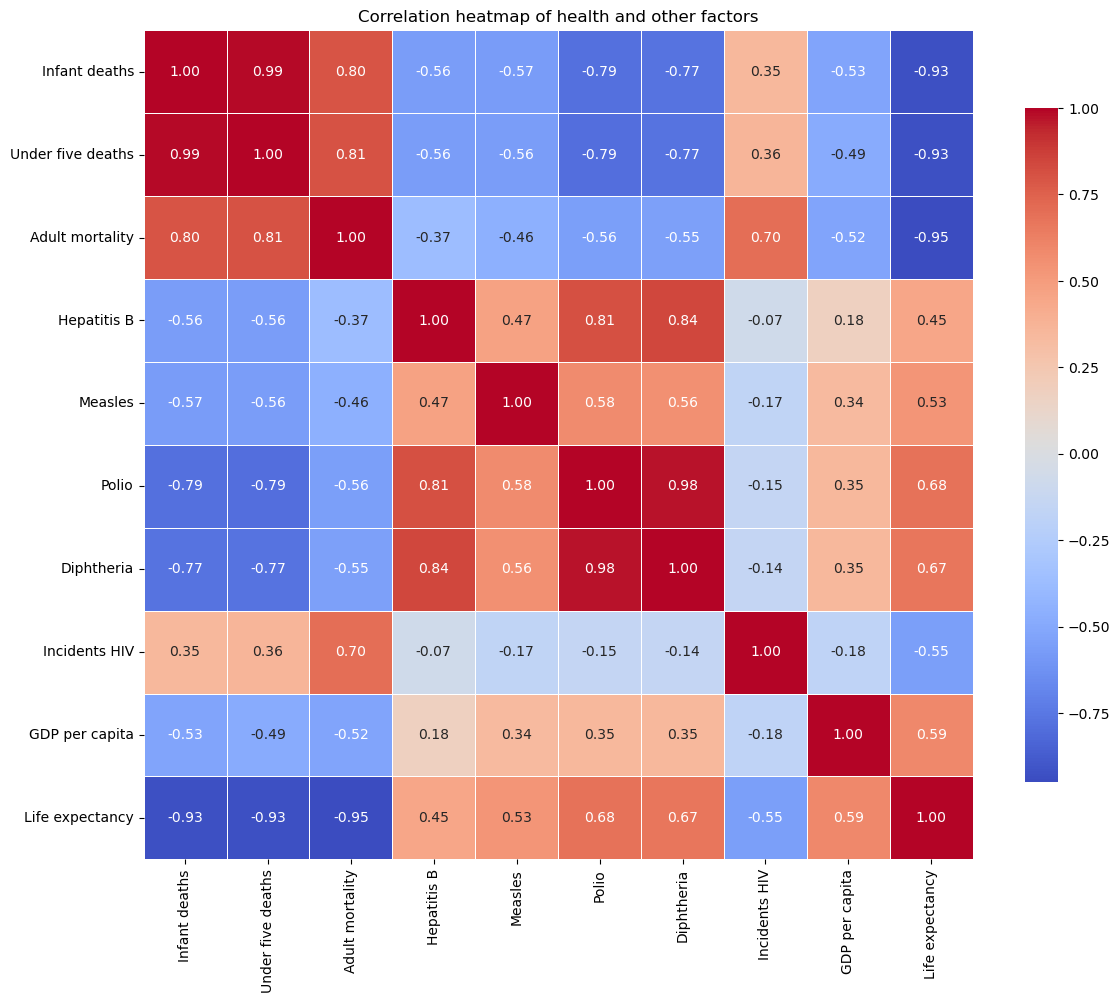

In [400]:
def heat_map():
    '''
    This is corelation heatmap of different vriables
    '''
    # Calculating the correlation matrix
    columns = ['Infant_deaths', 'Under_five_deaths', 'Adult_mortality', 'Hepatitis_B','Measles','Polio','Diphtheria','Incidents_HIV','GDP_per_capita','Life_expectancy']
    required_data= df[columns]
    new_column_names = ['Infant deaths', 'Under five deaths', 'Adult mortality', 'Hepatitis B','Measles','Polio','Diphtheria','Incidents HIV','GDP per capita','Life expectancy']
    required_data.columns = new_column_names
    correlation_matrix= required_data.corr()
    # Seting up the matplotlib figure
    plt.figure(figsize=(12, 10))
    
    # ploting the heatmap
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, 
                cbar_kws={"shrink": .8}, linewidths=0.5)
    
    # Adding title
    plt.title('Correlation heatmap of health and other factors')
    
    # Showing the plot
    plt.tight_layout()
    plt.show()
heat_map()#calling the function

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

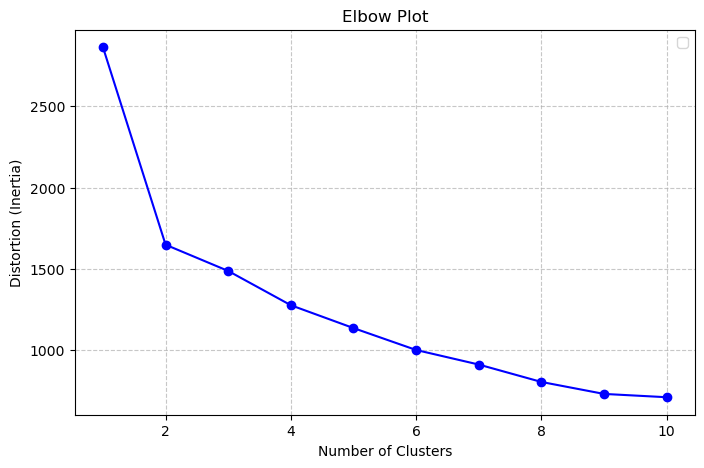

In [404]:
def elbow_plot(data, max_clusters=10):
    """
    Plots the elbow method for determining the optimal number of clusters for K-Means clustering.

    Parameters:
    - data: The dataset to be clustered (should be a DataFrame).
    - max_clusters: The maximum number of clusters to test (default is 10).
    """
    # Selecting only the relevant numerical columns for clustering
    numerical_columns = [
        'Infant_deaths', 'Under_five_deaths', 'Adult_mortality', 
        'Alcohol_consumption', 'Hepatitis_B', 'Measles', 
        'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 
        'GDP_per_capita', 'Population_mln', 
        'Thinness_ten_nineteen_years', 'Thinness_five_nine_years', 
        'Schooling', 'Life_expectancy'
    ]
    
    # Filtering the DataFrame to include only the numerical columns
    cleaned_data = data[numerical_columns]

    # Standardising the data
    scaler = StandardScaler()
    scaled_data= scaler.fit_transform(cleaned_data)

    distortions = []
    K = range(1, max_clusters + 1)
    
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_data)
        distortions.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 5))
    plt.plot(K, distortions, marker='o', color='blue')
    plt.title("Elbow Plot")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Distortion (Inertia)")
    plt.grid(axis='both', linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()

# df is the DataFrame containing the data
elbow_plot(df)#calling the function

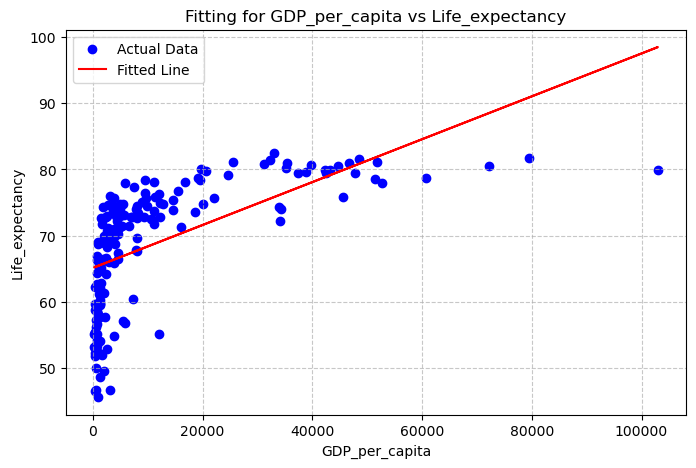

In [374]:
def perform_line_fitting():
    '''
    Regression line
    '''
    #taking the columns to plot
    x_column = 'GDP_per_capita'
    y_column = 'Life_expectancy'
    #extracting teh x and y values
    x = df[[x_column]].values
    y = df[y_column].values
    model = LinearRegression()
    model.fit(x, y)
    predictions = model.predict(x)
    
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, color='blue', label="Actual Data")
    plt.plot(x, predictions, color='red', label="Fitted Line")
    plt.title(f"Fitting for {x_column} vs {y_column}")
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.legend()
    plt.grid(axis='both', linestyle='--', alpha=0.7)
    plt.show()
    return
perform_line_fitting()